In [1]:
import pandas as pd

df = pd.read_csv("data/retail_sales_dataset.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [2]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.head()


,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
print("Duplicate rows:", df.duplicated().sum())
print(df.isna().sum())


Duplicate rows: 0
transaction_id      0
date                0
customer_id         0
gender              0
age                 0
product_category    0
quantity            0
price_per_unit      0
total_amount        0
dtype: int64


In [4]:
print("Duplicate rows:", df.duplicated().sum())
print(df.isna().sum())


Duplicate rows: 0
transaction_id      0
date                0
customer_id         0
gender              0
age                 0
product_category    0
quantity            0
price_per_unit      0
total_amount        0
dtype: int64


In [5]:
print("Quantity min:", df['quantity'].min())
print("Price per unit min:", df['price_per_unit'].min())
print("Total amount min:", df['total_amount'].min())


Quantity min: 1
Price per unit min: 25
Total amount min: 25


In [6]:
# Extract time features from date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_name()

# Preview
df.head()


,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,year,month,day,day_of_week
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,24,Friday
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,27,Monday
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,13,Friday
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,21,Sunday
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,6,Saturday


    year  month  total_amount year_month
0   2023      1         35450 2023-01-01
1   2023      2         44060 2023-02-01
2   2023      3         28990 2023-03-01
3   2023      4         33870 2023-04-01
4   2023      5         53150 2023-05-01
5   2023      6         36715 2023-06-01
6   2023      7         35465 2023-07-01
7   2023      8         36960 2023-08-01
8   2023      9         23620 2023-09-01
9   2023     10         46580 2023-10-01
10  2023     11         34920 2023-11-01
11  2023     12         44690 2023-12-01
12  2024      1          1530 2024-01-01


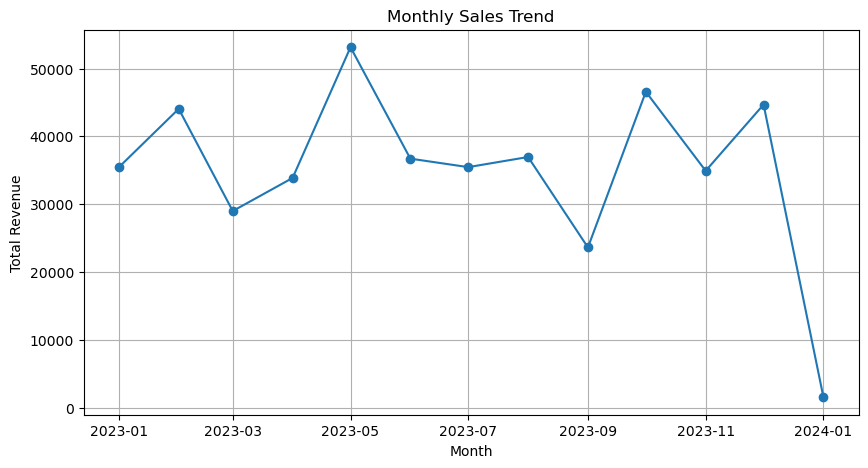

In [7]:
# Group sales by year and month
monthly_sales = df.groupby(['year','month'])['total_amount'].sum().reset_index()

# Create a "year-month" column for easier plotting
monthly_sales['year_month'] = pd.to_datetime(monthly_sales[['year','month']].assign(day=1))

print(monthly_sales)

# Plot trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(monthly_sales['year_month'], monthly_sales['total_amount'], marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()


product_category
Electronics    156905
Clothing       155580
Beauty         143515
Name: total_amount, dtype: int64


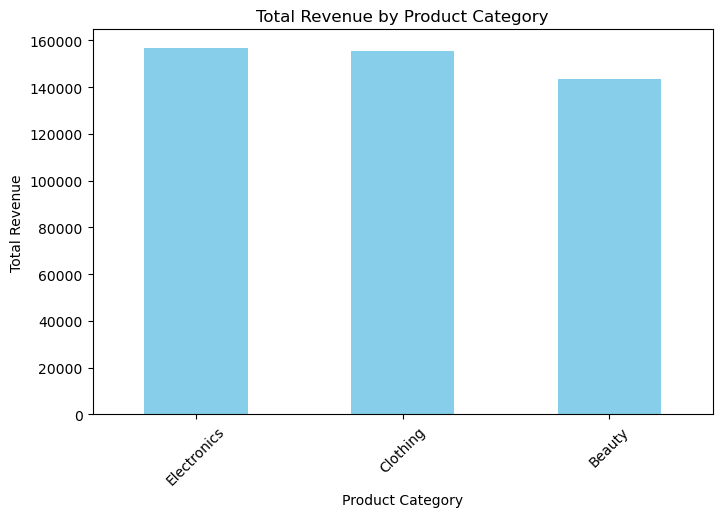

In [8]:
# Group by product category
category_sales = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False)

print(category_sales)

# Optional: plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
category_sales.plot(kind='bar', color='skyblue')
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


gender
Female    232840
Male      223160
Name: total_amount, dtype: int64


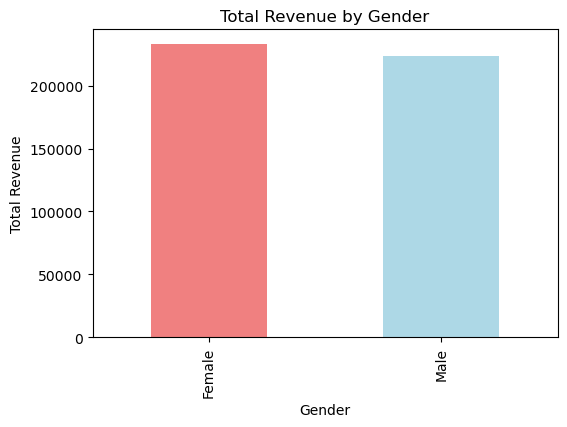

In [9]:
# Group sales by gender
gender_sales = df.groupby('gender')['total_amount'].sum()

print(gender_sales)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
gender_sales.plot(kind='bar', color=['lightcoral','lightblue'])
plt.title("Total Revenue by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Revenue")
plt.show()


C:\Users\bbeza\AppData\Local\Temp\ipykernel_25552\2165736991.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df.groupby('age_group')['total_amount'].sum()


age_group
18-25     73335
26-35     98480
36-50    139660
51+      133310
Name: total_amount, dtype: int64


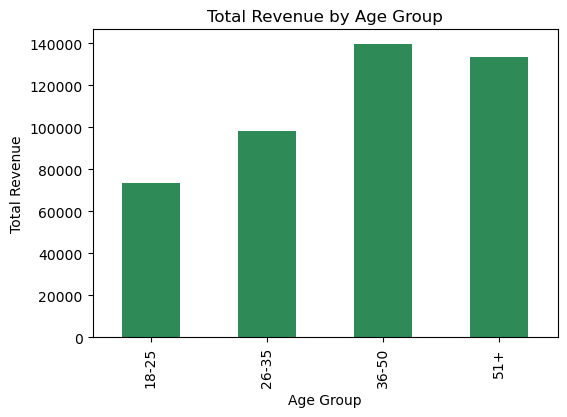

In [10]:
# Create age groups
bins = [18, 25, 35, 50, 100]
labels = ['18-25','26-35','36-50','51+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Group sales by age group
age_sales = df.groupby('age_group')['total_amount'].sum()

print(age_sales)

# Plot
plt.figure(figsize=(6,4))
age_sales.plot(kind='bar', color='seagreen')
plt.title("Total Revenue by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Revenue")
plt.show()


day_of_week
Monday       70250
Tuesday      69440
Wednesday    58770
Thursday     53835
Friday       66290
Saturday     78815
Sunday       58600
Name: total_amount, dtype: int64


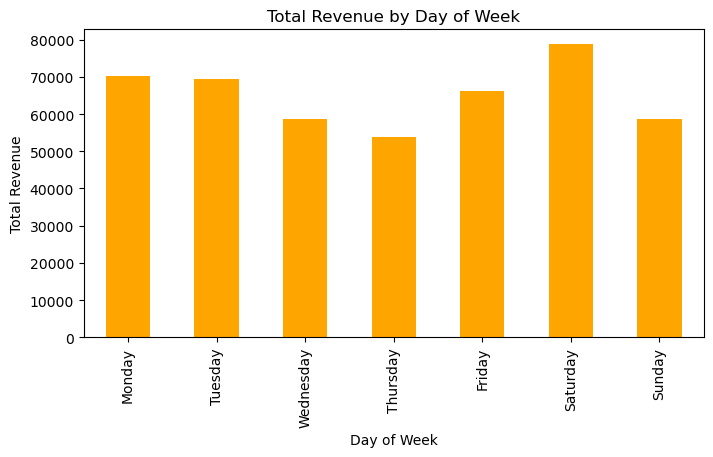

In [11]:
# Group sales by day of the week
dow_sales = df.groupby('day_of_week')['total_amount'].sum()

# Reorder days for readability
dow_sales = dow_sales.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

print(dow_sales)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
dow_sales.plot(kind='bar', color='orange')
plt.title("Total Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
plt.show()


In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Paths
DATA_PATH = "data/retail_sales_dataset.csv"
FIGS_DIR  = "figs"
OUTPUTS_DIR = "outputs"

os.makedirs(FIGS_DIR, exist_ok=True)
os.makedirs(OUTPUTS_DIR, exist_ok=True)

# Load & basic prep
df = pd.read_csv(DATA_PATH)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Feature engineering for time fields
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day_of_week"] = df["date"].dt.day_name()

# Optional: age groups
bins = [18, 25, 35, 50, 100]
labels = ["18-25", "26-35", "36-50", "51+"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=True)

# Helper: add labels to bars
def add_bar_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height, f"${height:,.0f}", 
                ha="center", va="bottom", fontsize=8)


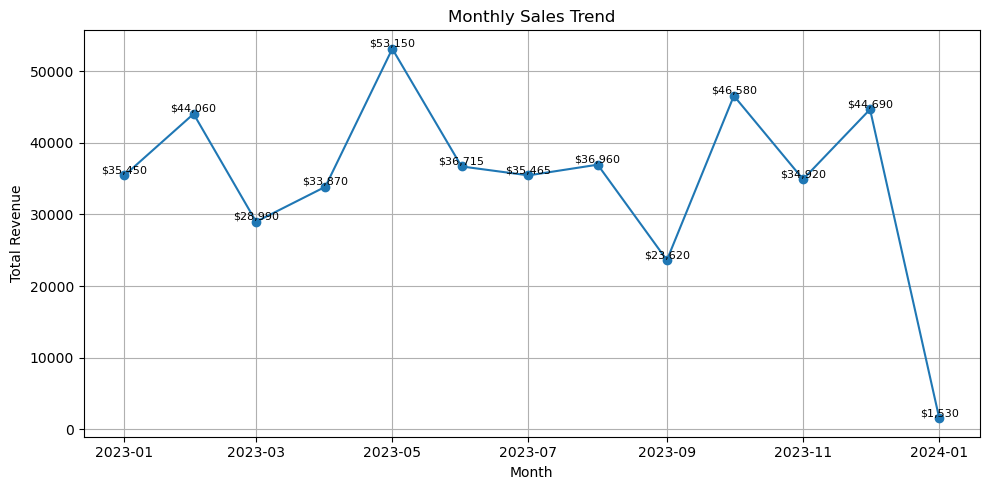

In [13]:
monthly = (df.groupby(["year","month"])["total_amount"]
             .sum()
             .reset_index())
monthly["year_month"] = pd.to_datetime(monthly[["year","month"]].assign(day=1))

plt.figure(figsize=(10,5))
plt.plot(monthly["year_month"], monthly["total_amount"], marker="o")
for x, y in zip(monthly["year_month"], monthly["total_amount"]):
    plt.text(x, y, f"${y:,.0f}", ha="center", va="bottom", fontsize=8)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{FIGS_DIR}/monthly_sales_trend.png", dpi=300)
plt.show()

# Optional: export the table for Power BI
monthly[["year","month","total_amount"]].to_csv(f"{OUTPUTS_DIR}/monthly_sales.csv", index=False)


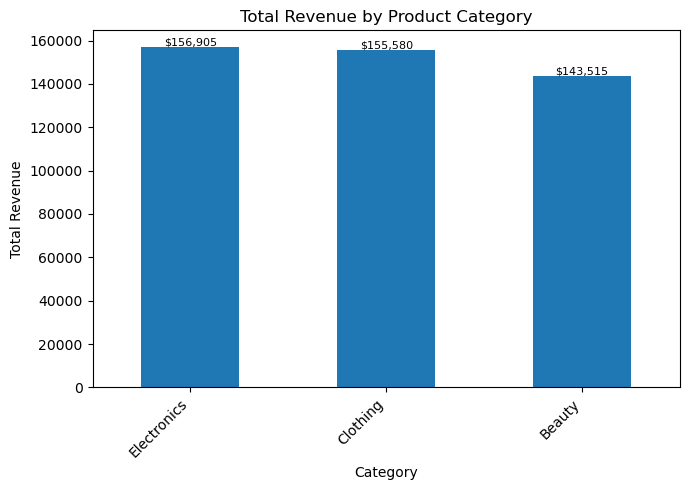

In [14]:
by_cat = (df.groupby("product_category")["total_amount"]
            .sum()
            .sort_values(ascending=False))

plt.figure(figsize=(7,5))
ax = by_cat.plot(kind="bar")
plt.title("Total Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
add_bar_labels(ax)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(f"{FIGS_DIR}/revenue_by_category.png", dpi=300)
plt.show()

# Optional export
by_cat.reset_index().to_csv(f"{OUTPUTS_DIR}/category_revenue.csv", index=False)


C:\Users\bbeza\AppData\Local\Temp\ipykernel_25552\918072892.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender = (df.groupby(["age_group","gender"])["total_amount"]


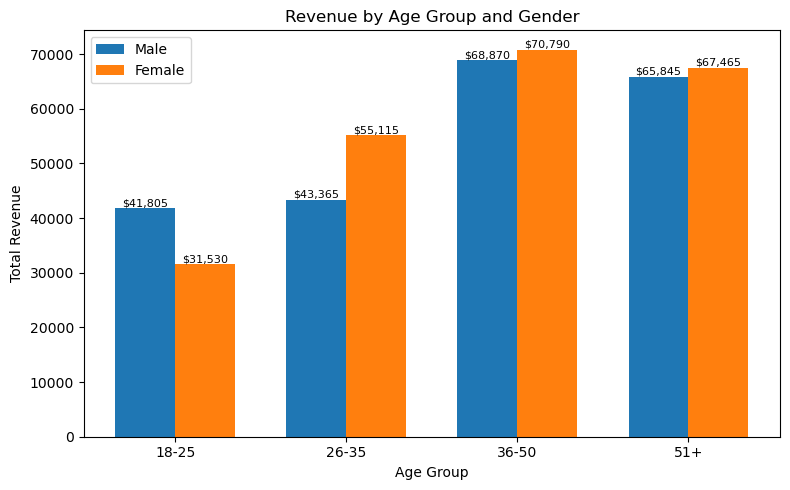

In [15]:
# Pivot to get a clustered bar chart (columns = gender)
age_gender = (df.groupby(["age_group","gender"])["total_amount"]
                .sum()
                .unstack(fill_value=0)
                .reindex(index=["18-25","26-35","36-50","51+"]))

plt.figure(figsize=(8,5))
x = np.arange(len(age_gender.index))
width = 0.35

males = age_gender.get("Male", pd.Series(0, index=age_gender.index))
fems  = age_gender.get("Female", pd.Series(0, index=age_gender.index))

bar1 = plt.bar(x - width/2, males, width, label="Male")
bar2 = plt.bar(x + width/2, fems,  width, label="Female")
plt.title("Revenue by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Total Revenue")
plt.xticks(x, age_gender.index)
plt.legend()

# Labels
for b in bar1 + bar2:
    h = b.get_height()
    plt.text(b.get_x()+b.get_width()/2, h, f"${h:,.0f}", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.savefig(f"{FIGS_DIR}/revenue_by_age_gender.png", dpi=300)
plt.show()

# Optional export
age_gender.reset_index().to_csv(f"{OUTPUTS_DIR}/age_gender_revenue.csv", index=False)


In [ ]:
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
dow = (df.groupby("day_of_week")["total_amount"]
         .sum()
         .reindex(order))

plt.figure(figsize=(8,5))
ax = dow.plot(kind="bar")
plt.title("Total Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
add_bar_labels(ax)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(f"{FIGS_DIR}/revenue_by_day_of_week.png", dpi=300)
plt.show()

# Optional export
dow.reset_index().to_csv(f"{OUTPUTS_DIR}/dow_revenue.csv", index=False)
